
<img src="fga.png" width="1200" height="400">


<h1><center>Aula Extra 1 - Leitura de Dados e Exploratory Data Analysis (EDA)
</center></h1>

Sempre que iniciamos um projeto de aprendizado de máquina (ML) ou modelagem estatística, precisamos primeiro fazer uma análise exploratória de dados (EDA). Isso inclui coisas como: plotagens de dados brutos, histogramas e muito mais ...

<ul>
    <li> <b>Sinais Financeiros - UnB</b> </li>
    <a href="https://www.linkedin.com/in/marcelino-andrade-b164b369/">
    <li> <b>Prof. Marcelino Monteiro de Andrade Dr.</b> </li> </a>
    <li> <b>19/02/2021</b> </li>
</ul>


<h1>Table of contents</h1>

<div class="alert alert-block alert-info" style="margin-top: 20px">
    <ol> 
        <li><a href="#Leitura 1">Leitura de preços - investpy</a></li>
        <li><a href="#Leitura 2">Leitura de preços - Dados Pagos</a></li>
        <li><a href="#Leitura 3">Leitura de preços - MetaTrader</a></li>
        <li><a href="#Graficos"> Representações Gráficas do preço e do retorno </a></li>
    </ol>
</div>
<br>
<hr>

<h2>Bibliotecas de Refência</h2>

In [1]:

import pandas as pd
import investpy
from tqdm import tqdm
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import datetime as dt

<div id="Leitura 1">
    <h2>1) Leitura de preços - Método 1: investpy</h2>
</div>

In [2]:
df = pd.read_html('http://bvmf.bmfbovespa.com.br/indices/ResumoCarteiraTeorica.aspx?Indice=IBOV&idioma=pt-br')
symbols=list(df[0]['Código'].values)
#symbols=[sy+".sa" for sy in symbols[:-1]]
len(symbols)

82

In [3]:
np.array(symbols)

array(['ABEV3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBSE3',
       'BEEF3', 'BPAC11', 'BRAP4', 'BRDT3', 'BRFS3', 'BRKM5', 'BRML3',
       'BTOW3', 'CCRO3', 'CIEL3', 'CMIG4', 'COGN3', 'CPFE3', 'CPLE6',
       'CRFB3', 'CSAN3', 'CSNA3', 'CVCB3', 'CYRE3', 'ECOR3', 'EGIE3',
       'ELET3', 'ELET6', 'EMBR3', 'ENBR3', 'ENEV3', 'ENGI11', 'EQTL3',
       'EZTC3', 'FLRY3', 'GGBR4', 'GNDI3', 'GOAU4', 'GOLL4', 'HAPV3',
       'HGTX3', 'HYPE3', 'IGTA3', 'IRBR3', 'ITSA4', 'ITUB4', 'JBSS3',
       'JHSF3', 'KLBN11', 'LAME4', 'LCAM3', 'LREN3', 'MGLU3', 'MRFG3',
       'MRVE3', 'MULT3', 'NTCO3', 'PCAR3', 'PETR3', 'PETR4', 'PRIO3',
       'QUAL3', 'RADL3', 'RAIL3', 'RENT3', 'SANB11', 'SBSP3', 'SULA11',
       'SUZB3', 'TAEE11', 'TIMS3', 'TOTS3', 'UGPA3', 'USIM5', 'VALE3',
       'VIVT3', 'VVAR3', 'WEGE3', 'YDUQ3',
       'Quantidade Teórica Total  Redutor'], dtype='<U33')

In [4]:
output = None
cols=[]
today=str(dt.date.today())
today=today[-2:]+"/"+today[-5:-3]+"/"+today[:4]
 
for symbol in tqdm(symbols):
    try: 
        df = investpy.get_stock_historical_data(stock=symbol,
                                                country='Brazil',
                                                from_date='01/01/2019',
                                                to_date=today)
        cols.append(symbol)

        if output is None:
            output = df.Close
        else:
            output = pd.concat([output, df.Close], axis = 1)
    except:
        print("Erro = "+symbol)
output.columns=cols

 73%|███████▎  | 60/82 [01:12<00:15,  1.42it/s]

Erro = NTCO3
Erro = PCAR3


 89%|████████▉ | 73/82 [01:28<00:08,  1.06it/s]

Erro = TIMS3


100%|██████████| 82/82 [01:38<00:00,  1.20s/it]

Erro = Quantidade Teórica Total  Redutor


In [5]:
output.tail()

ABEV3  AZUL4  B3SA3  BBAS3  BBDC3  BBDC4  BBSE3  BEEF3  BPAC11  \
Date                                                                         
2021-02-09  15.01  42.75  60.05  33.81  22.29  25.17  28.72   9.30  108.75   
2021-02-10  14.95  43.04  60.32  33.94  22.35  25.20  28.64   9.51  111.60   
2021-02-11  14.79  42.86  59.86  33.75  22.40  25.20  28.01   9.58  109.00   
2021-02-16  15.27  43.33  59.01  33.36  22.17  25.18  27.94  10.07  109.32   
2021-02-17  14.79  42.30  58.02  33.26  21.85  24.91  27.66   9.63  106.20   

            BRAP4  ...  SUZB3  TAEE11  TOTS3  UGPA3  USIM5  VALE3  VIVT3  \
Date               ...                                                     
2021-02-09  63.06  ...  68.20   32.61  31.41  23.71  13.81  94.70  47.65   
2021-02-10  62.80  ...  70.66   32.51  33.85  23.41  14.14  93.10  48.95   
2021-02-11  62.60  ...  70.72   32.59  34.64  23.40  14.19  93.89  48.40   
2021-02-16  64.01  ...  72.39   32.32  34.08  23.31  15.01  96.35  47.35   
2021-02-17  64.40  ...  74.04   31.92  33.90  22.50  14.83  97.40  46.22   

            VVAR3  WEGE3  YDUQ3  
Date                             
2021-02-09  14.35  86.03  32.00  
2021-02-10  14.60  87.00  33.10  
2021-02-11  14.48  86.67  32.76  
2021-02-16  14.62  83.95  32.85  
2021-02-17  14.49  83.38  32.88  

[5 rows x 78 columns]

<AxesSubplot:ylabel='Date'>

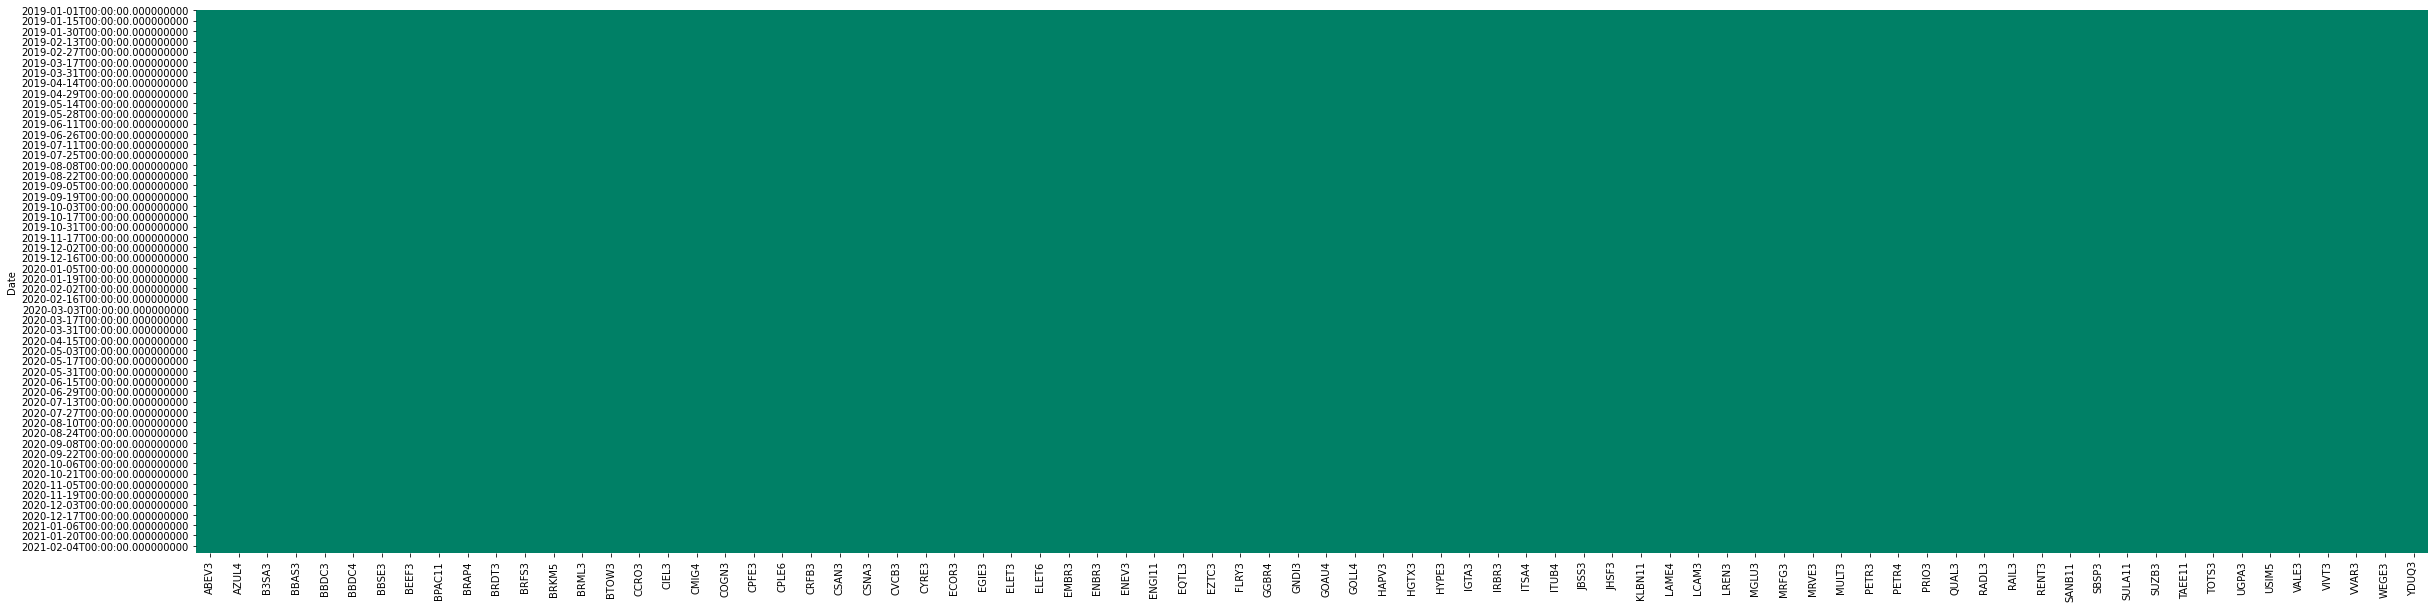

In [6]:
%matplotlib inline 
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')

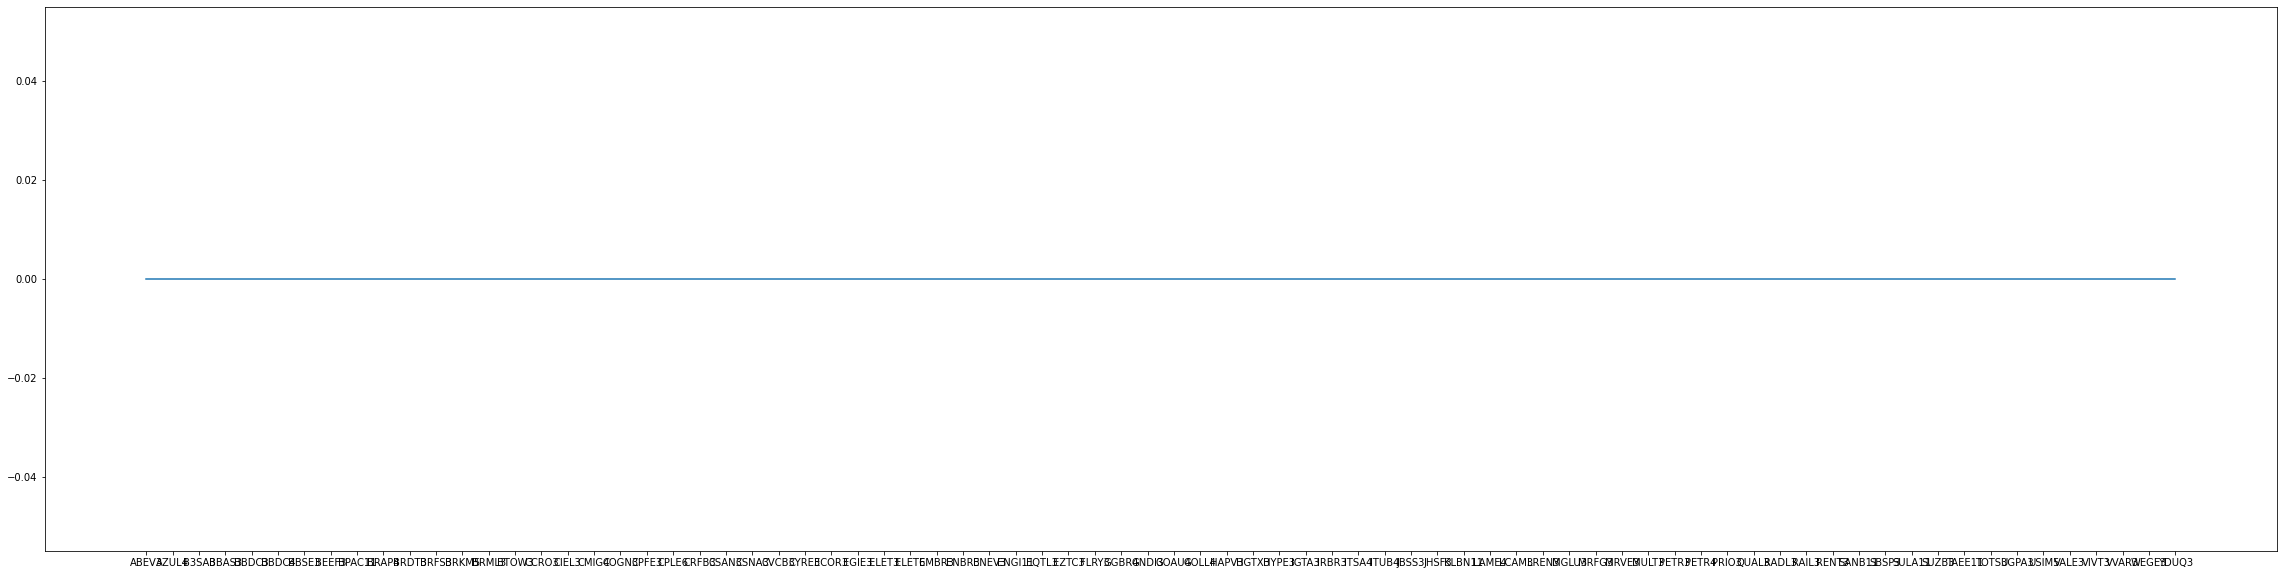

In [7]:

plt.figure(figsize=(40,10))
plt.plot(cols ,output.isnull().sum().values)

<AxesSubplot:xlabel='Date'>

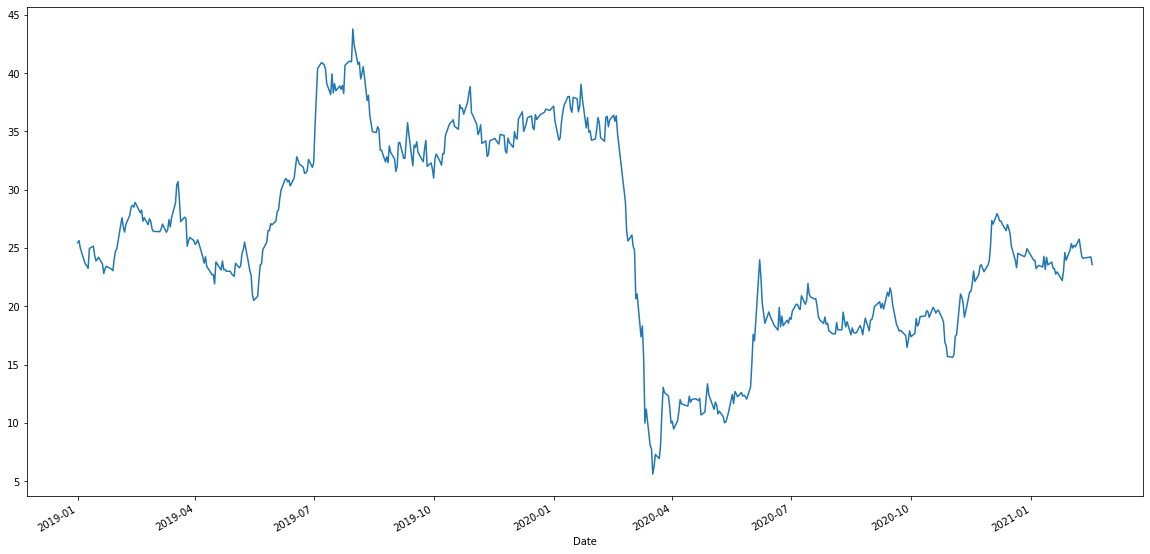

In [8]:
output['GOLL4'].plot(figsize=(20,10))

<div id="Leitura 2">
    <h2>2) Leitura de preços - Método 2: Dados Pagos</h2>
</div>

In [9]:
from os import listdir
from os.path import isfile, join

dir_data='./data_csv/'
csvs = [f for f in listdir(dir_data) if isfile(join(dir_data, f)) and f.endswith("csv")]
csvs

['AMAR3.sa.daily.csv',
 'ABCB4.sa.daily.csv',
 'BRKM5.sa.daily.csv',
 'CPLE6.sa.daily.csv',
 'BRPR3.sa.daily.csv',
 'ALPA4.sa.daily.csv',
 'CSAN3.sa.daily.csv',
 'BPAN4.sa.daily.csv',
 'BTOW3.sa.daily.csv',
 'BKBR3.sa.daily.csv',
 'ABEV3.sa.daily.csv',
 'BRFS3.sa.daily.csv',
 'BRSR6.sa.daily.csv',
 'CMIG4.sa.daily.csv',
 'CESP6.sa.daily.csv',
 'BRML3.sa.daily.csv',
 'CPFE3.sa.daily.csv',
 'BBDC4.sa.daily.csv',
 'CSMG3.sa.daily.csv',
 'CAML3.sa.daily.csv',
 'CPLE3.sa.daily.csv',
 'BIDI4.sa.daily.csv',
 'BBDC3.sa.daily.csv',
 'BPAC11.sa.daily.csv',
 'ALSO3.sa.daily.csv',
 'AZUL4.sa.daily.csv',
 'BEEF3.sa.daily.csv',
 'BIDI11.sa.daily.csv',
 'CSNA3.sa.daily.csv',
 'ALUP11.sa.daily.csv',
 'CMIG3.sa.daily.csv',
 'CCRO3.sa.daily.csv',
 'CIEL3.sa.daily.csv',
 'BBAS3.sa.daily.csv',
 'ANIM3.sa.daily.csv',
 'COGN3.sa.daily.csv',
 'BBSE3.sa.daily.csv',
 'BRDT3.sa.daily.csv',
 'CRFB3.sa.daily.csv',
 'BRAP4.sa.daily.csv',
 'ARZZ3.sa.daily.csv']

<AxesSubplot:ylabel='index'>

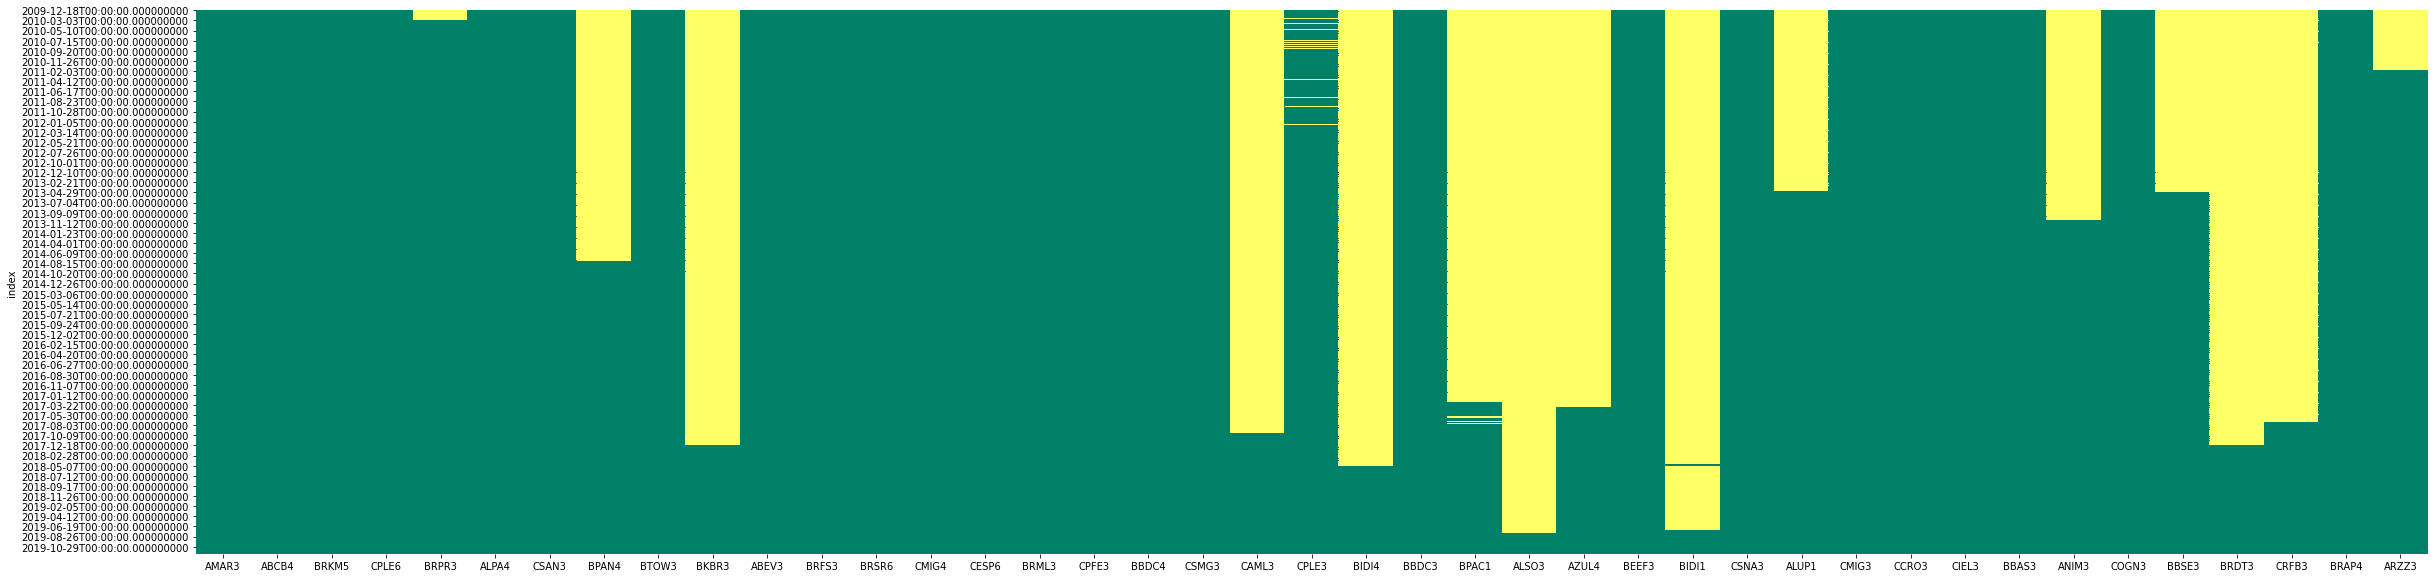

In [10]:
li = []
for csv in csvs:
    df = pd.read_csv(dir_data+csv, index_col=None, header=None)
    li.append(df[[0,4]][1:])

output = None

for i in range(len(li)):

    if output is None:
        df = li[i]
        df.columns=['date',csvs[i][0:5]]
   #     df['date']=[pd.to_datetime(df['date'].iloc[i][:10], format='%d/%m/%Y') for i in range(len(df))]
        df=df.set_index('date')
        output=df

    else:
        df = li[i]
        df.columns=['date',csvs[i][0:5]]
    #    
        df=df.set_index('date')
        output=pd.concat([output,df],axis=1) 
output.reset_index( inplace=True)        
output['index']=[pd.to_datetime(output['index'].iloc[i][:10], format='%d/%m/%Y') for i in range(len(output))]        
output=output.sort_values(by='index')
output=output.set_index('index')
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')

In [11]:
output.head()

AMAR3 ABCB4  BRKM5  CPLE6 BRPR3 ALPA4  CSAN3 BPAN4  BTOW3 BKBR3  \
index                                                                        
2009-12-18  8.65  6.18   9.24  24.34   NaN  2.44  15.25   NaN  38.24   NaN   
2009-12-21  8.65  6.23   9.59  24.87   NaN  2.46  14.82   NaN  37.97   NaN   
2009-12-22  8.77  6.33  10.12  24.67   NaN  2.48  15.81   NaN  37.29   NaN   
2009-12-23  8.80  6.31  10.00  24.59   NaN  2.48  16.11   NaN  37.02   NaN   
2009-12-28  8.72  6.23   9.70  24.14   NaN  2.50  16.59   NaN  38.05   NaN   

            ... CCRO3 CIEL3  BBAS3 ANIM3 COGN3 BBSE3 BRDT3 CRFB3  BRAP4 ARZZ3  
index       ...                                                                
2009-12-18  ...  6.06  4.50  15.77   NaN  1.77   NaN   NaN   NaN  22.85   NaN  
2009-12-21  ...  6.04  4.57  15.56   NaN  1.80   NaN   NaN   NaN  22.77   NaN  
2009-12-22  ...  6.17  4.58  15.53   NaN  1.82   NaN   NaN   NaN  23.16   NaN  
2009-12-23  ...  6.08  4.66  15.56   NaN  1.86   NaN   NaN   NaN  23.45   NaN  
2009-12-28  ...  6.10  4.72  15.56   NaN  1.85   NaN   NaN   NaN  23.58   NaN  

[5 rows x 41 columns]

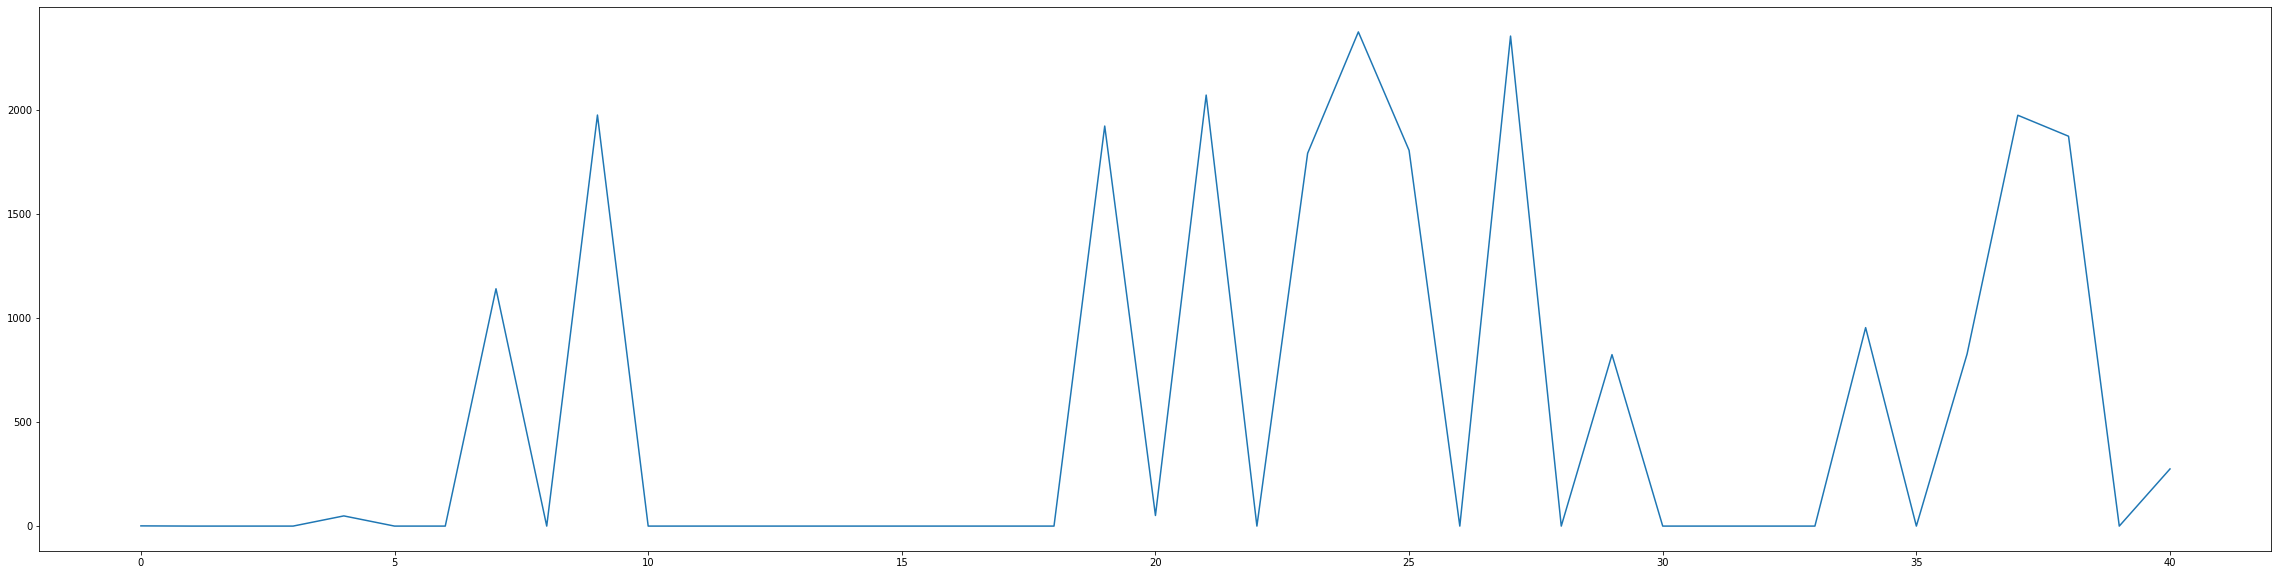

In [12]:
plt.figure(figsize=(40,10))
plt.plot(output.isnull().sum().values)

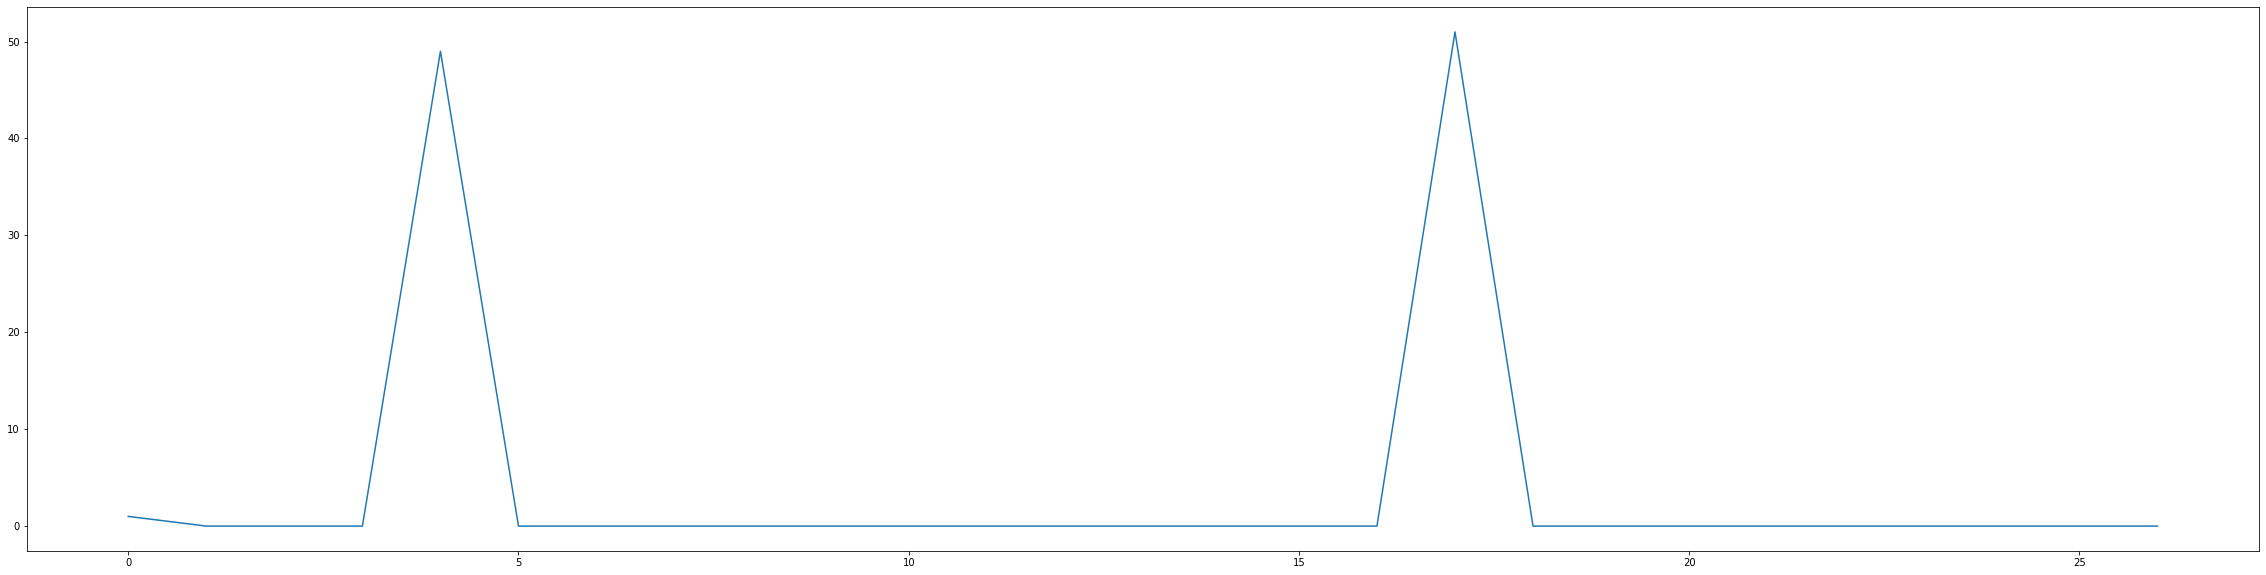

In [13]:
cols_remove=list(output.columns[output.isnull().sum()>0.1*len(output)])
output.drop(cols_remove, axis=1,inplace=True)
plt.figure(figsize=(40,10))
plt.plot(output.isnull().sum().values)

<AxesSubplot:ylabel='index'>

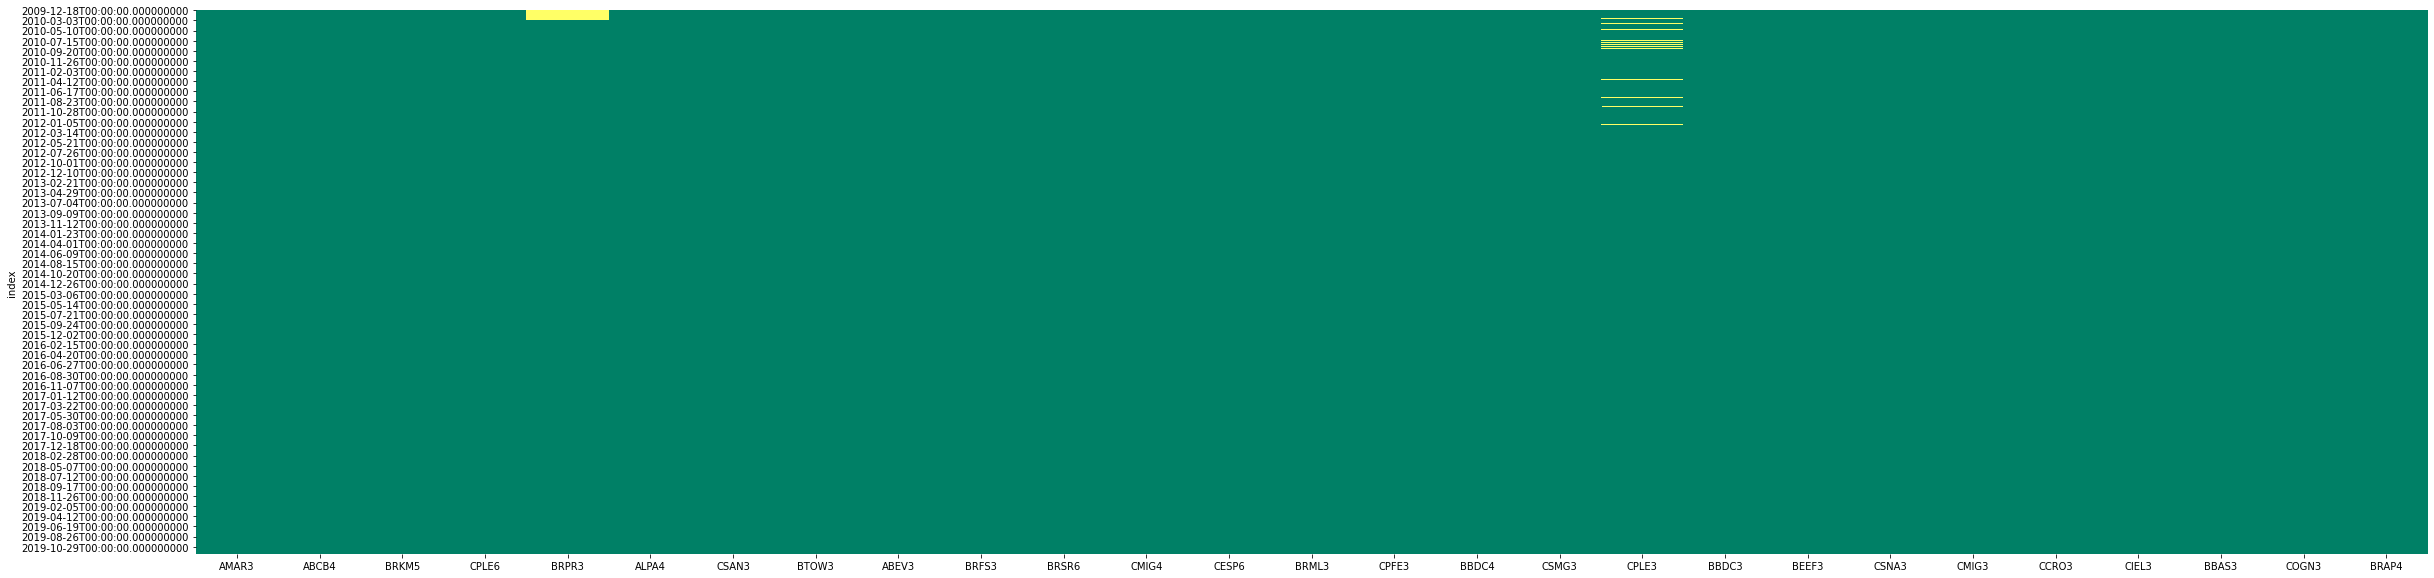

In [14]:
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')

['Erros', 0, 'Ativos', 24]

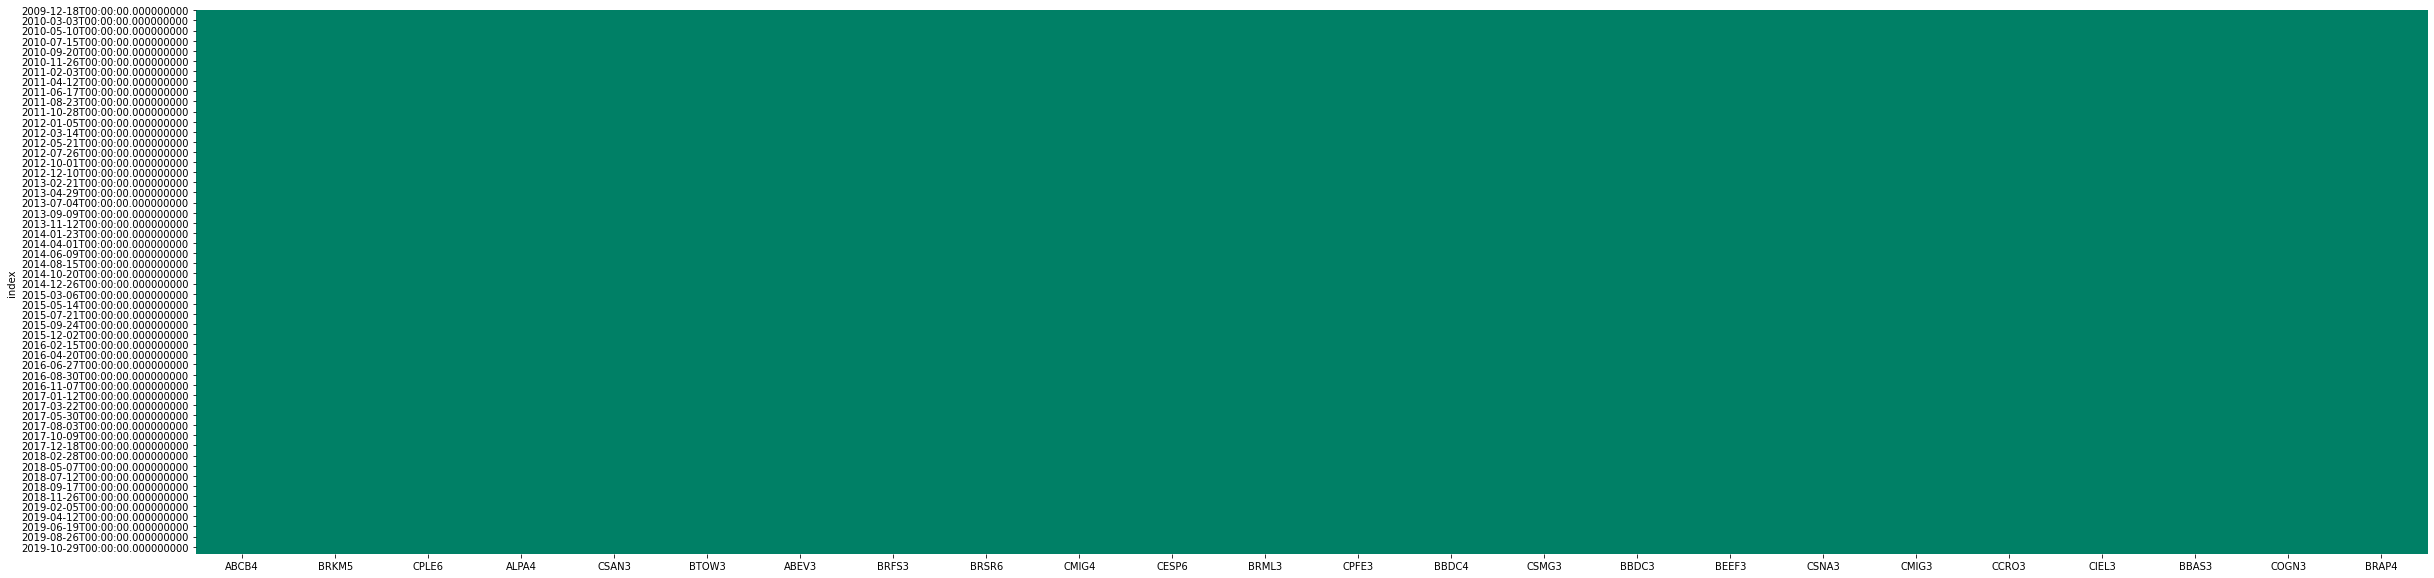

In [15]:
import numpy as np
output=output.dropna(axis='columns')
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

<div id="Leitura 3">
    <h2>3) Leitura de preços - Método 3: MetaTrader</h2>
</div>

In [17]:
dir_data='./data_mt5/'
csvs = [f for f in listdir(dir_data) if isfile(join(dir_data, f)) and f.endswith("csv")]
li = []
import csv
from csv import reader
print(csv.__file__)
output = None


for csv in csvs:
    price=[]
    with open(dir_data+csv, 'r', encoding="utf16") as csvfile:
        readCSV = reader(csvfile, delimiter=',')
        for row in readCSV:
            price.append([row[0].split('\t')[0][0:10],row[0].split('\t')[1]])
        df=pd.DataFrame(price)
        df.columns=['data',csv[:-4]]
        df=df.set_index('data')

        if output is None:
            output=df
        else:
            output=pd.concat([output,df],axis=1) 

output=output.astype(float)    
output[["PETR3","GGBR4","LAME4","WEGE3"]].dropna().tail()


/usr/lib/python3.6/csv.py


PETR3  GGBR4  LAME4  WEGE3
2020.06.05  22.62  15.17  29.70  44.22
2020.06.09  22.46  14.96  30.25  45.69
2020.06.12  21.03  13.88  31.30  44.14
2020.06.15  21.11  13.55  31.80  44.16
2020.06.16  21.98  14.80  31.56  44.65

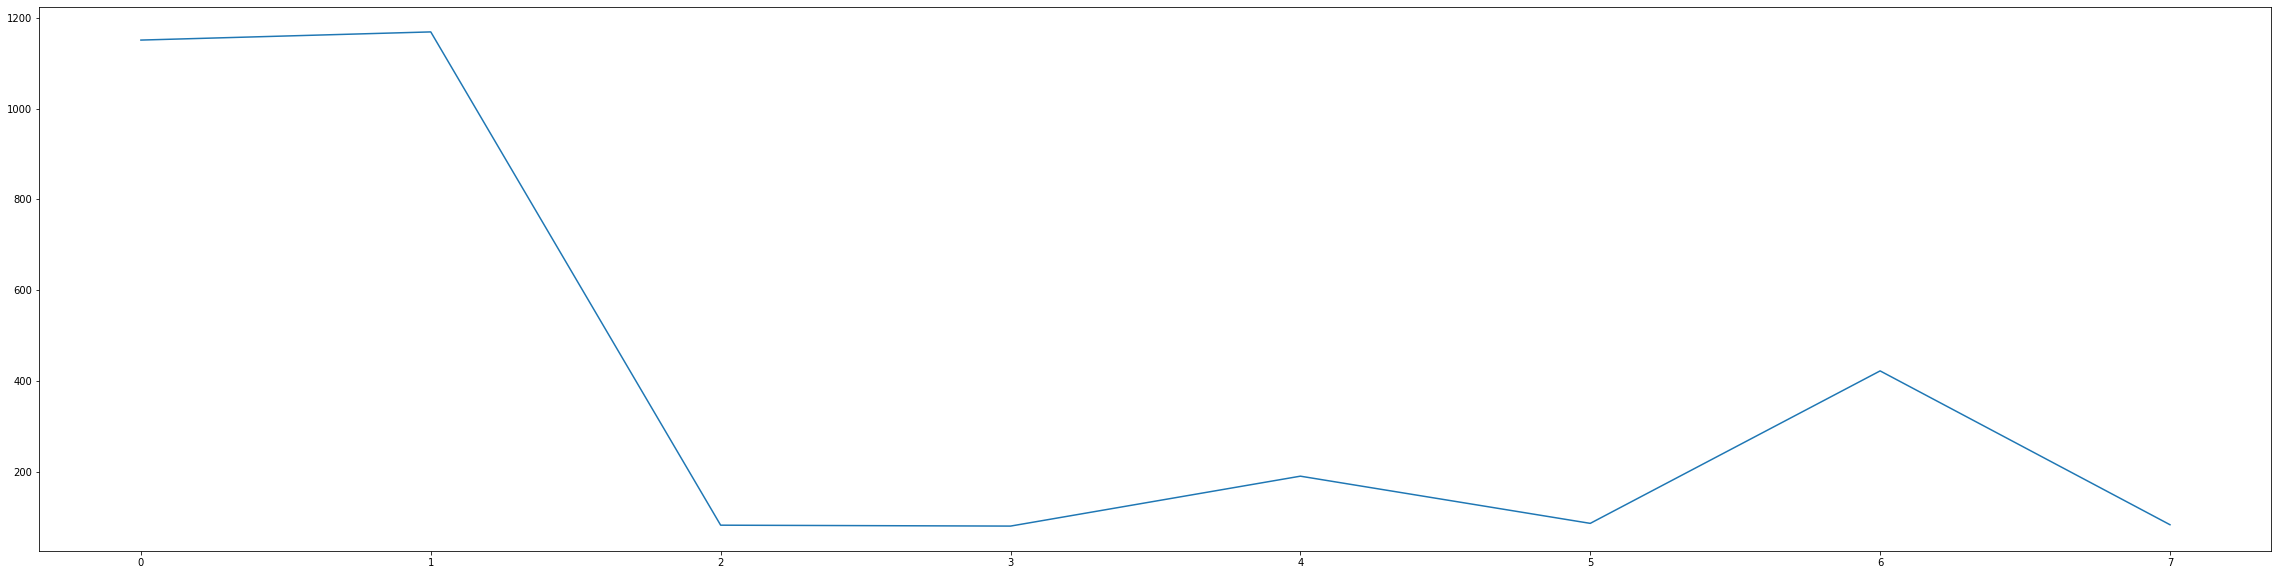

In [18]:
plt.figure(figsize=(40,10))
plt.plot(output.isnull().sum().values)

['Erros', 3263, 'Ativos', 8]

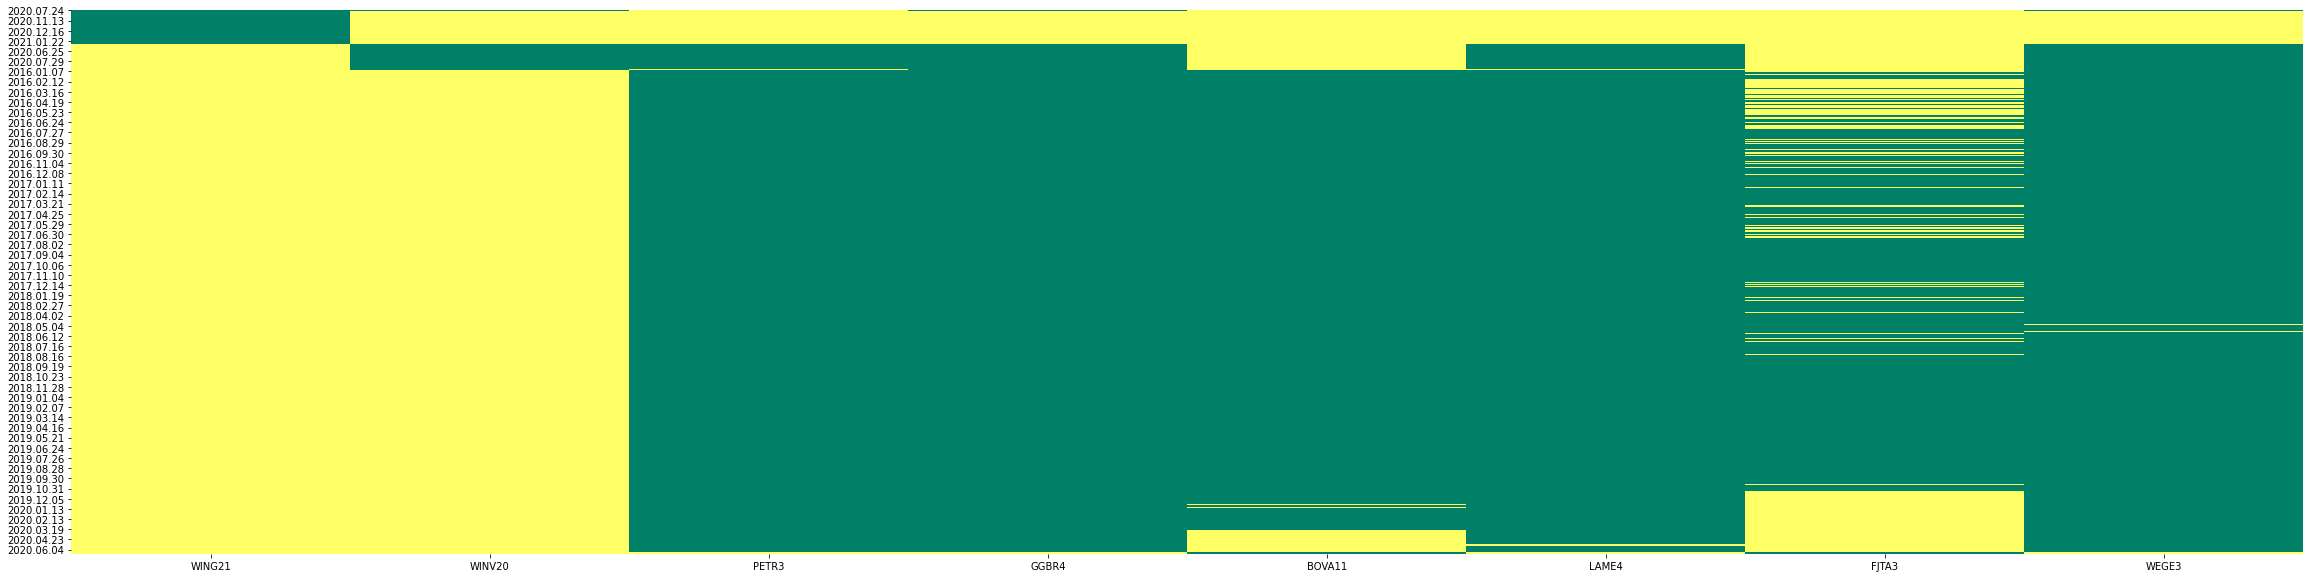

In [19]:
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

In [20]:
output.to_excel("output.xlsx")

<div id="Graficos">
    <h2>4) Representações Gráficas do preço e do retorno</h2>
</div>

In [21]:

N=20

output = None
cols=[]
today=str(dt.date.today())
today=today[-2:]+"/"+today[-5:-3]+"/"+today[:4]
 
for symbol in tqdm(symbols[:20]):
    try: 
        df = investpy.get_stock_historical_data(stock=symbol,
                                                country='Brazil',
                                                from_date='01/01/2019',
                                                to_date=today)
        cols.append(symbol)

        if output is None:
            output = df.Close
        else:
            output = pd.concat([output, df.Close], axis = 1)
    except:
        print("Erro = "+symbol)
output.columns=cols

100%|██████████| 20/20 [00:25<00:00,  1.25s/it]


['Erros', 0, 'Ativos', 20]

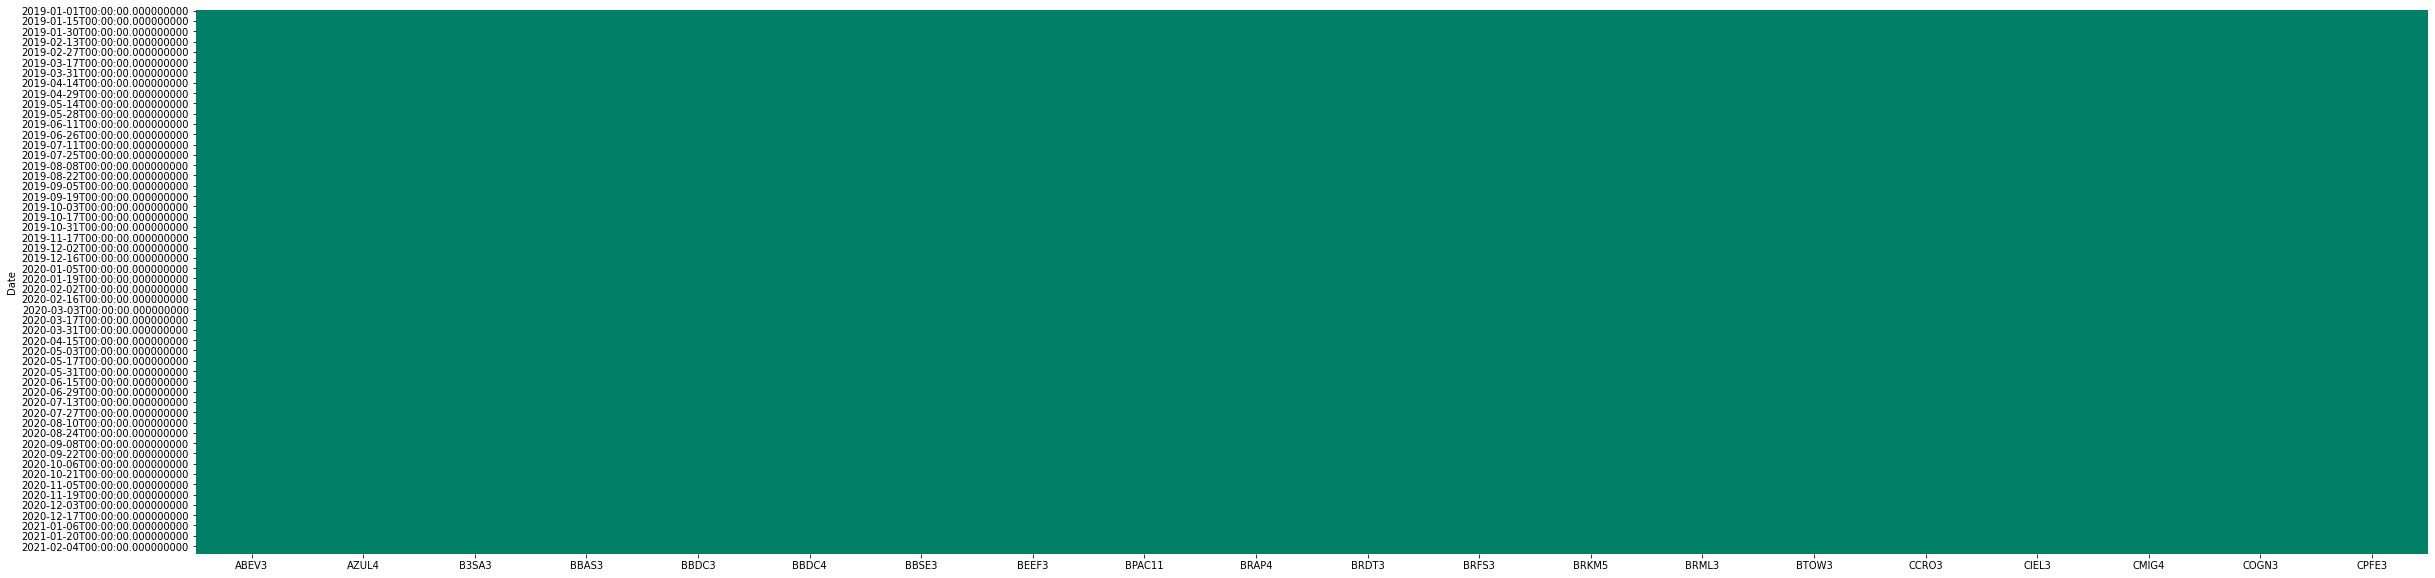

In [22]:
plt.figure(figsize=(40,10))
sns.heatmap(output.isnull(),  cbar=False, cmap = 'summer')
["Erros",np.sum(output.isnull().sum()),"Ativos",len(output.columns)]

<AxesSubplot:>

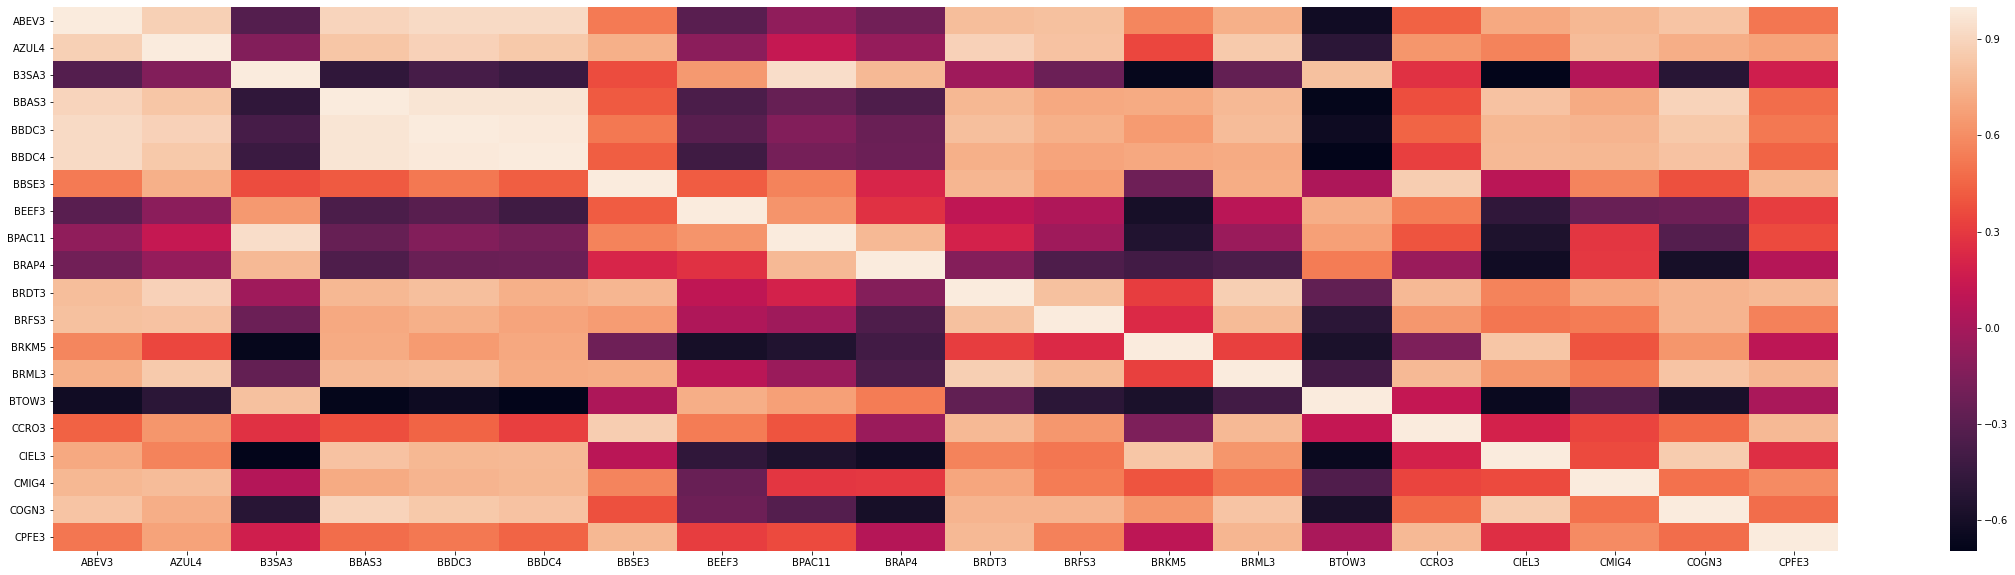

In [23]:

plt.figure(figsize=(40,10))
sns.heatmap(output.corr())

In [24]:
output.pct_change().corr().mean()

ABEV3     0.477070
AZUL4     0.547034
B3SA3     0.576328
BBAS3     0.628800
BBDC3     0.622231
BBDC4     0.611314
BBSE3     0.511722
BEEF3     0.319530
BPAC11    0.555344
BRAP4     0.416511
BRDT3     0.569565
BRFS3     0.427728
BRKM5     0.496093
BRML3     0.556584
BTOW3     0.435875
CCRO3     0.585395
CIEL3     0.443219
CMIG4     0.593019
COGN3     0.519960
CPFE3     0.529494
dtype: float64

In [25]:
class report(object):
    def grafic_01(output,ativo):
            fig=plt.figure(figsize=(20,5));
            stock_return = output[ativo].pct_change()
            vol=100*stock_return.rolling(12).std() * np.sqrt(12)
            ax=vol.plot(x_compat=True,style='m',label='Volatilidade', title=ativo);
            plt.ylabel("Volatilidade [%]")
            output[ativo].plot(x_compat=True, secondary_y=True, style='y--',label='Volume');
            ax.right_ax.set_ylabel('Preço')
            fig.tight_layout()
            plt.grid(False)
            pass
    def grafic_02(output,ativo):
            fig=plt.figure(figsize=(20,5));
            ax = fig.add_subplot(111)
            stock_return=100*output[ativo].pct_change()
            stock_return.hist(bins=len(output), density = True,color='c')
            stock_return.plot(kind = "kde")
            plt.axvline(stock_return.mean(), color='k', linestyle='dashed', linewidth=2)            
            plt.title(ativo+': RMD = '+str(round(stock_return.mean(),2))+'% e '+'SMD = '
                      +str(round(stock_return.std(),2))+'%',fontsize=16)  
            ax.grid(False)
            ax.set_xlabel("Retorno Diário [%]", fontsize=12)
            ax.set_ylabel("Densidade", fontsize=12)
            fig.tight_layout()
            pass
    def grafic_03(output,ativo1,ativo2):
            ativo1_close_return=100*output[ativo1].pct_change().dropna()
            ativo2_close_return=100*output[ativo2].pct_change().dropna()        
            X = ativo1_close_return
            X = sm.add_constant(X)
            y = ativo2_close_return
            model = sm.OLS(y,X).fit()
            beta = model.params[1]
            alpha = model.params[0]
            fig, ax1 = plt.subplots(1,figsize=(5,5))
            ax1.scatter(X[X.columns[1]],y,label="Retorno Diário", color='blue', edgecolors='none', alpha=0.7)
            X_prime_0 = np.linspace(X[X.columns[1]].min(),X[X.columns[1]].max(), 100)
            X_prime = sm.add_constant(X_prime_0)
            y_hat = model.predict(X_prime)
            ax1.scatter(X_prime_0,y_hat,label="Retorno Diário", color='red', edgecolors='none', alpha=0.5)
            ax1.grid(True)
            ax1.set_xlabel("Retorno Diário "+ativo1+" [%]",fontsize=16)
            ax1.set_ylabel("Retorno Diário "+ativo2+" [%]", fontsize=16)
            ax1.set_title("Alpha = "+str(round(alpha,2))+", Beta = "+str(round(beta,2)), fontsize=16)
            pass
    def grafic_04(output):
            fig = plt.figure(figsize=(20, 5))
            ax = fig.add_subplot(111)
            bp = ax.boxplot(output.values)
            pass
    def grafic_05(output):
            sns.pairplot(output)
            pass

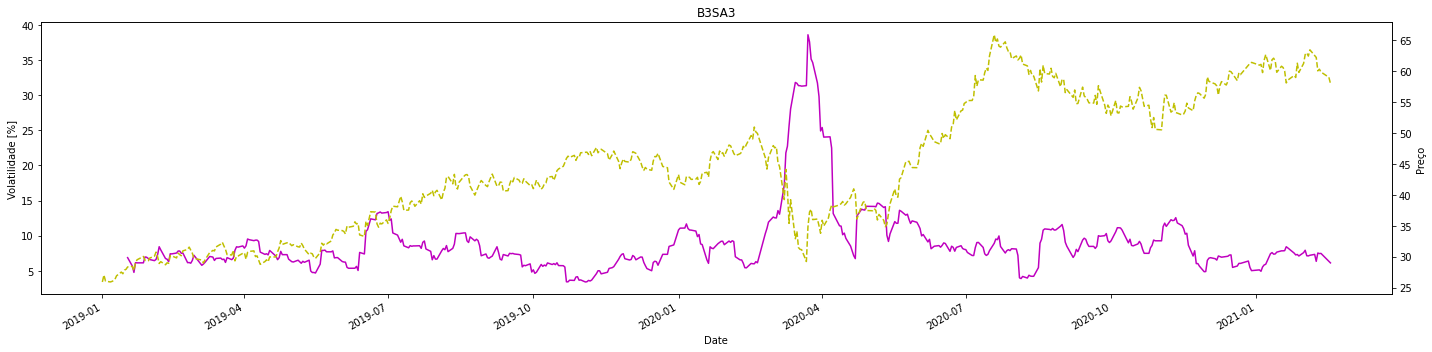

In [26]:
%matplotlib inline 
report.grafic_01(output,'B3SA3')

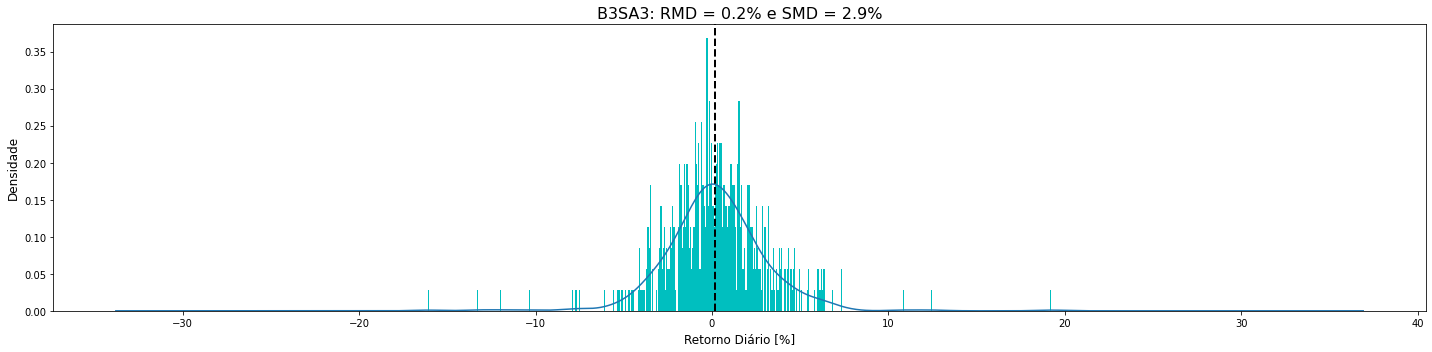

In [27]:
%matplotlib inline 
report.grafic_02(output,'B3SA3')

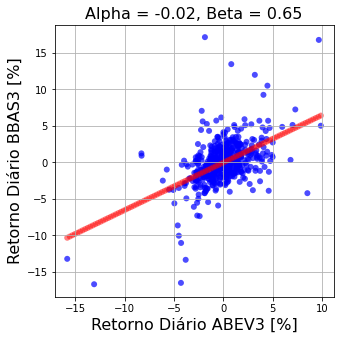

In [28]:
%matplotlib inline 
import statsmodels.api as sm
report.grafic_03(output,'ABEV3','BBAS3')

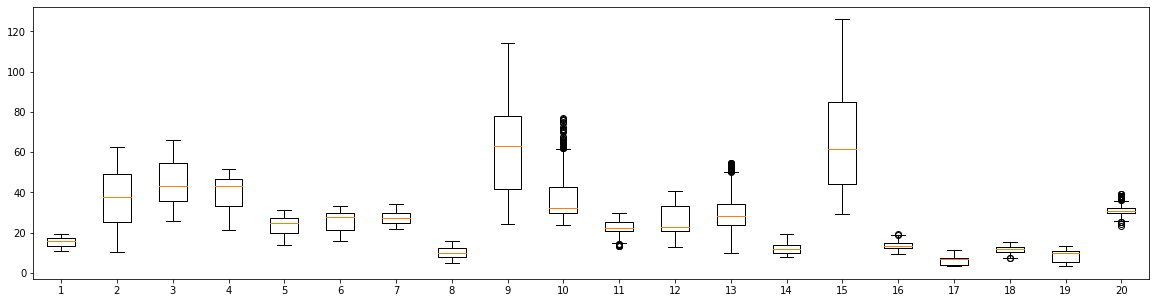

In [29]:
%matplotlib inline 
report.grafic_04(output)

In [30]:
output.columns

Index(['ABEV3', 'AZUL4', 'B3SA3', 'BBAS3', 'BBDC3', 'BBDC4', 'BBSE3', 'BEEF3',
       'BPAC11', 'BRAP4', 'BRDT3', 'BRFS3', 'BRKM5', 'BRML3', 'BTOW3', 'CCRO3',
       'CIEL3', 'CMIG4', 'COGN3', 'CPFE3'],
      dtype='object')

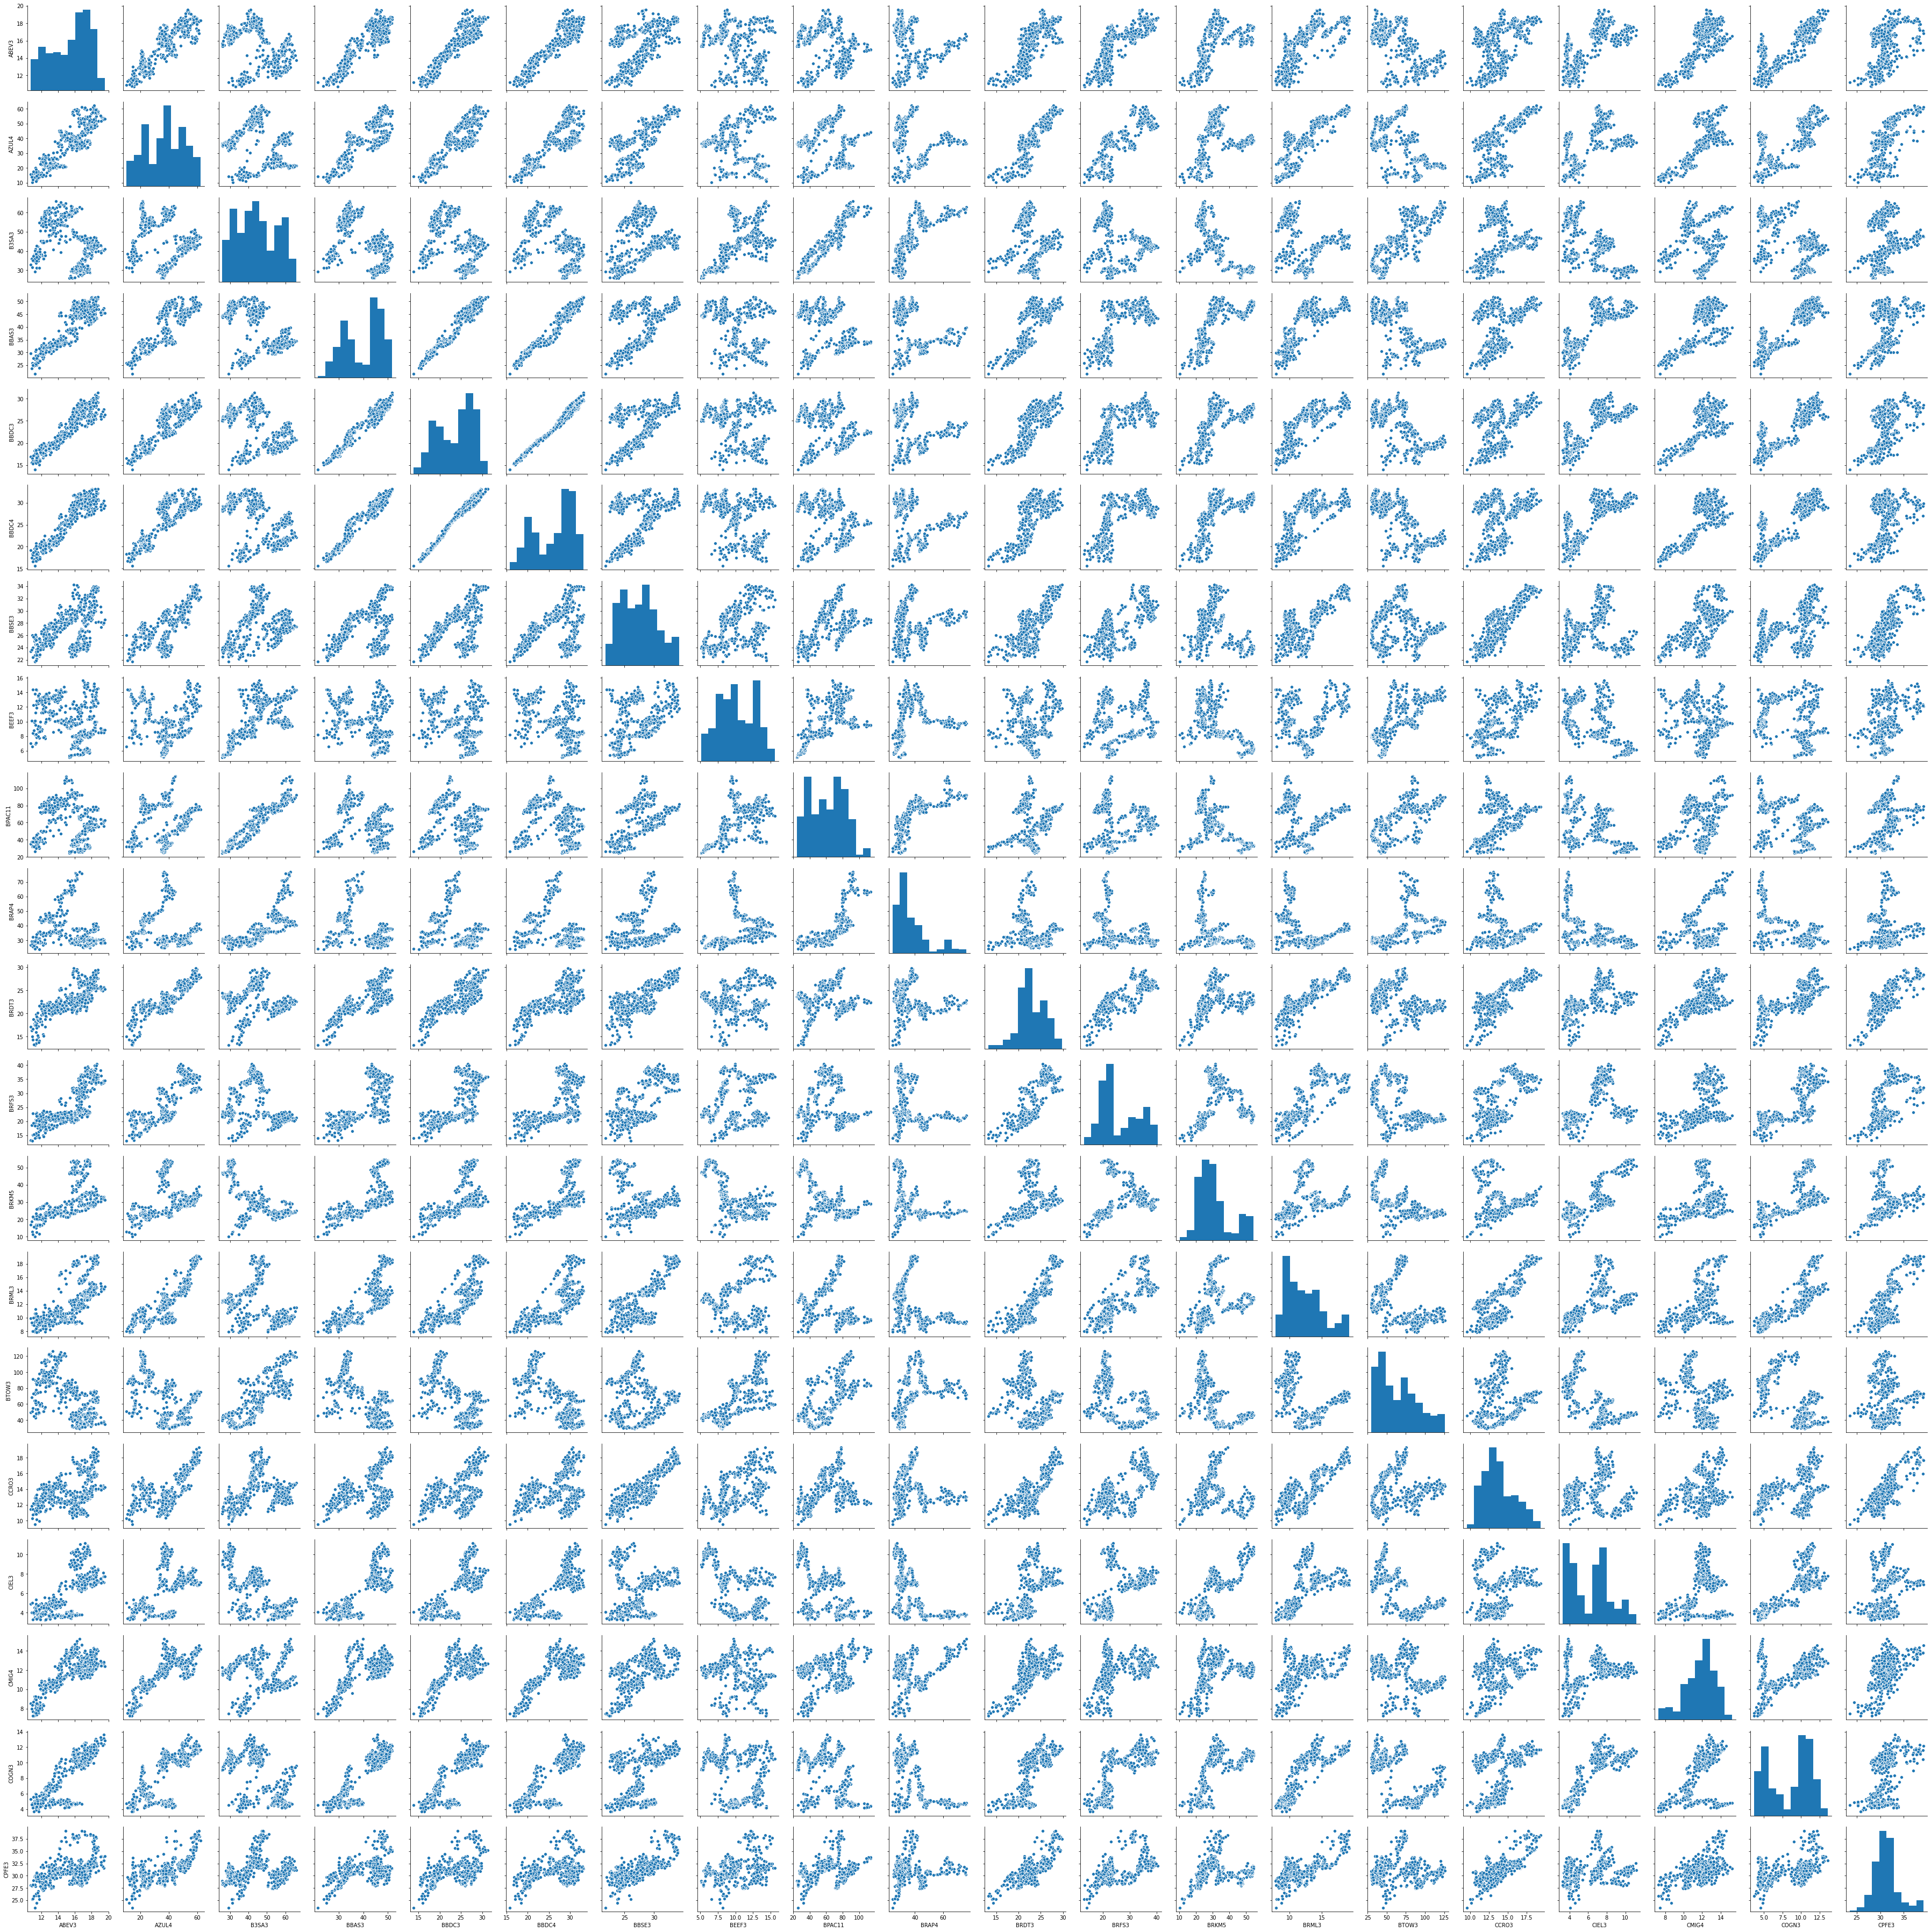

In [31]:
%matplotlib inline 
report.grafic_05(output)

In [ ]:
%matplotlib inline 
report.grafic_05(output.pct_change().dropna())